In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
data = pd.read_csv("air-pollution.csv")
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48225 entries, 0 to 48224
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Entity                                                    48225 non-null  object 
 1   Code                                                      45717 non-null  object 
 2   Year                                                      48225 non-null  int64  
 3   Nitrogen oxide (NOx)                                      48225 non-null  float64
 4   Sulphur dioxide (SO₂) emissions                           48225 non-null  float64
 5   Carbon monoxide (CO) emissions                            48225 non-null  float64
 6   Organic carbon (OC) emissions                             48225 non-null  float64
 7   Non-methane volatile organic compounds (NMVOC) emissions  48225 non-null  float64
 8   Black carbon (BC

Entity                                                          0
Code                                                         2508
Year                                                            0
Nitrogen oxide (NOx)                                            0
Sulphur dioxide (SO₂) emissions                                 0
Carbon monoxide (CO) emissions                                  0
Organic carbon (OC) emissions                                   0
Non-methane volatile organic compounds (NMVOC) emissions        0
Black carbon (BC) emissions                                     0
Ammonia (NH₃) emissions                                         0
Unnamed: 10                                                 48225
dtype: int64

In [87]:
data = data.drop('Unnamed: 10', axis=1)
data = data.drop('Code', axis=1)
data.isnull().sum()

Entity                                                      0
Year                                                        0
Nitrogen oxide (NOx)                                        0
Sulphur dioxide (SO₂) emissions                             0
Carbon monoxide (CO) emissions                              0
Organic carbon (OC) emissions                               0
Non-methane volatile organic compounds (NMVOC) emissions    0
Black carbon (BC) emissions                                 0
Ammonia (NH₃) emissions                                     0
dtype: int64

In [111]:
# data['Nitrogen oxide (NOx)'].reindex()

data.describe(include='all')

/var/folders/k3/gt4lmtwj7m541vkjm2tnqqhm0000gn/T/ipykernel_90963/1722268511.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  data['Nitrogen oxide (NOx)'].replace('NOx emissions')


,Entity,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions
count,48225,48225.000000,4.822500e+04,4.822500e+04,4.822500e+04,4.822500e+04,4.822500e+04,4.822500e+04,4.822500e+04
unique,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1911.032970,5.407779e+05,8.091183e+05,4.885731e+06,1.315203e+05,8.771926e+05,4.738836e+04,3.521420e+05
std,NaN,67.608974,4.408950e+06,5.761058e+06,2.851080e+07,6.740897e+05,5.769500e+06,2.769505e+05,2.326560e+06
min,NaN,1750.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,1854.000000,1.569637e+02,6.362120e+01,1.367615e+04,5.955074e+02,2.313765e+03,1.490397e+02,1.370903e+03
50%,NaN,1913.000000,1.781608e+03,9.523438e+02,1.087148e+05,4.429489e+03,1.770346e+04,1.090644e+03,9.434461e+03
75%,NaN,1970.000000,3.104208e+04,3.370849e+04,6.107858e+05,2.220716e+04,1.132467e+05,6.594997e+03,5.192593e+04


<Axes: >

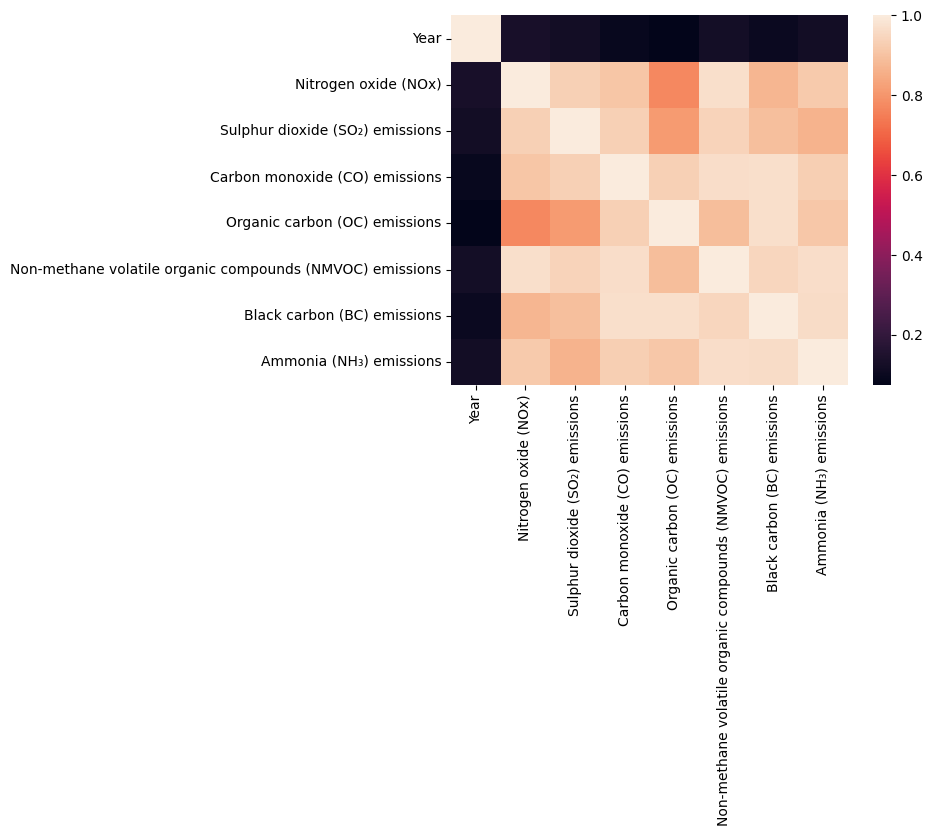

In [112]:
numeric_data = data.drop('Entity', axis=   1)
sns.heatmap(numeric_data.corr())

                  

In [114]:
numeric_data.corr()

,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions
Year,1.000000,0.132867,0.120274,0.094444,0.074130,0.121540,0.102582,0.119613
Nitrogen oxide (NOx),0.132867,1.000000,0.934162,0.906114,0.771669,0.969701,0.869818,0.917554
Sulphur dioxide (SO₂) emissions,0.120274,0.934162,1.000000,0.933213,0.811679,0.939315,0.892067,0.863424
Carbon monoxide (CO) emissions,0.094444,0.906114,0.933213,1.000000,0.933103,0.967004,0.968427,0.931006
Organic carbon (OC) emissions,0.074130,0.771669,0.811679,0.933103,1.000000,0.887988,0.967552,0.910310
Non-methane volatile organic compounds (NMVOC) emissions,0.121540,0.969701,0.939315,0.967004,0.887988,1.000000,0.949301,0.966858
Black carbon (BC) emissions,0.102582,0.869818,0.892067,0.968427,0.967552,0.949301,1.000000,0.963496
Ammonia (NH₃) emissions,0.119613,0.917554,0.863424,0.931006,0.910310,0.966858,0.963496,1.000000


In [118]:

y_data = data['Year']
x_data = pd.DataFrame({ 'Ammonia (NH₃) emissions' : data['Ammonia (NH₃) emissions'],
                        'Sulplhur dioxide (SO2) emissions' : data['Sulphur dioxide (SO₂) emissions'],
                        'Carbon monoxide (CO) emissions' : data['Carbon monoxide (CO) emissions'], 
                        'Organic carbon (OC) emissions' : data['Organic carbon (OC) emissions']

})

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=20)

In [119]:
from sklearn.svm import SVR
clf = SVR(kernel='rbf')
clf.fit(x_train, y_train)





SVR()

In [121]:
y_pred = clf.predict(x_test)

In [130]:
import numpy as np
from sklearn.metrics import mean_squared_error

def get_metrics(y_pred, y_test, model: str):
    svr_mse = mean_squared_error(y_test, y_pred)
    svr_mae = np.mean(np.abs(y_test - y_pred))
    svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    svr_msle = np.mean((np.log1p(y_test) - np.log1p(y_pred)) ** 2)


    fd = pd.DataFrame(data = { 
                                'Mean squared error' : [svr_mse], 
                                'Mean absolute error' : [svr_mae],
                                'Root mean squared error' : [svr_rmse],
                                'Mean_squared_logarithmic_error' : [svr_msle]

    },
                              index = [model])
    # fd.set_index()
    return fd

In [132]:
import numpy as np
from sklearn.metrics import mean_squared_error





get_metrics(y_pred, y_test, 'SVR')

,Mean squared error,Mean absolute error,Root mean squared error,Mean_squared_logarithmic_error
SVR,4372.935904,56.613376,66.128178,0.001207
